## Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)

Diego Elián Rodríguez Cantú A00829925

## Dataset Utilizado

**Nombre del Dataset:** SMS Spam Collection Dataset

**Enlace al Dataset:** [SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

**Descripción de los Datos:**

- Cantidad de Registros/Muestras: El dataset contiene un total de 5,572 mensajes de texto etiquetados como spam o no spam ("ham").

- Número de Características: Las características se derivan de la representación de texto en forma de vectores de términos (TF-IDF), por lo que el número de características depende de la dimensionalidad del espacio de términos. En este caso, se han utilizado un máximo de 10,000 términos, lo que significa que cada mensaje se representa mediante un vector de características de longitud 10,000.

- Número de Clases de Salida: El problema es de clasificación binaria, por lo que hay dos clases de salida: "spam" y "no spam" (o "ham").


In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import nltk
nltk.download('wordnet')
# from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('omw-1.4')
import pickle
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

mssgdata = pd.read_csv('spam.csv', encoding='latin-1')
X, y = mssgdata.v2, mssgdata.v1

documents = []

from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
for sen in range(0, len(X)):
    document = re.sub(r'\W', ' ', str(X[sen]))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    document = document.lower()
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
    
vectorizer = CountVectorizer(max_features=10000, min_df=1, max_df=0.6, ngram_range=(1,2), stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elian\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).

In [2]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


## Entrenamiento y evaluación del modelo base.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Entrenar el modelo de Random Forest con el conjunto de entrenamiento
classifier = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs= -1)
classifier.fit(X_train, y_train)

y_pred_test = classifier.predict(X_test)

# Calcular el accuracy en el conjunto de prueba
accuracy_base = accuracy_score(y_test, y_pred_test)
print(f'Precisión del modelo base en el conjunto de prueba: {accuracy_base:.2f}')


Precisión del modelo base en el conjunto de prueba: 0.98


**El rendimiento del modelo con el conjunto de prueba es el siguiente**

In [4]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[467   0]
 [ 12  78]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       467
        spam       1.00      0.87      0.93        90

    accuracy                           0.98       557
   macro avg       0.99      0.93      0.96       557
weighted avg       0.98      0.98      0.98       557

0.9784560143626571


**El rendimiento del modelo con el conjunto de entrenamiento es el siguiente:**

In [5]:
#conjunto de entrenamiento
y_pred_train = classifier.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Precisión del modelo base en el conjunto de entrenamiento: {accuracy_train:.2f}')

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

Precisión del modelo base en el conjunto de entrenamiento: 1.00
[[3876    0]
 [   1  580]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3876
        spam       1.00      1.00      1.00       581

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

0.9997756338344178


## Diagnóstico del sesgo y la varianza.

- Sesgo: El sesgo se refiere a la diferencia entre las predicciones del modelo y los valores reales en el conjunto de entrenamiento. Si el sesgo es alto, el modelo subajusta los datos.
- Varianza: La varianza se refiere a la sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. Si la varianza es alta, el modelo sobreajusta los datos.

   
1. **Conjunto de Pruebas (Test Set)**:
   - Precisión: 0.9785 (98.85%)
   - Recall (Exhaustividad): 0.87 (87%)
   - F1-Score: 0.93 (93%)
   - Exactitud (Accuracy): 0.9785 (98.85%)

2. **Conjunto de Entrenamiento (Training Set)**:
   - Precisión: 0.9998 (99.98%)
   - Recall (Exhaustividad): 1.0 (100%)
   - F1-Score: 1.0 (100%)
   - Exactitud (Accuracy): 0.9998 (99.98%)

**Análisis**:

- **Sesgo (Bias)**:
  - El modelo muestra un sesgo bajo en ambos conjuntos, ya que tanto en el conjunto de entrenamiento como en el de pruebas, la precisión, el recall, el F1-score y la exactitud son altos.
  - En el conjunto de entrenamiento, el modelo tiene una precisión y exactitud del 99.98%, lo que indica que es muy bueno para predecir tanto spam como mensajes no spam correctamente en los datos con los que fue entrenado.
  - En el conjunto de pruebas, aunque la precisión es ligeramente inferior al conjunto de entrenamiento (98.85%), sigue siendo bastante alta, lo que sugiere que el modelo generaliza bien a datos nuevos.

- **Varianza**:
  - La varianza es una medida de cuánto cambian las predicciones del modelo cuando se aplican a diferentes conjuntos de datos. Una alta varianza a menudo indica sobreajuste.
  - En este caso, el modelo parece tener una baja varianza, ya que el rendimiento en el conjunto de pruebas no se degrada significativamente en comparación con el conjunto de entrenamiento.
  - La diferencia en la precisión entre el conjunto de entrenamiento y el conjunto de pruebas es mínima (0.9998 vs. 0.9785), lo que sugiere que el modelo no está sobreajustando significativamente los datos de entrenamiento.

**Gráfico**:

Se puede visualizar el sesgo y la varianza del modelo mediante una curva de aprendizaje. Esto mostrará cómo cambia el rendimiento a medida que aumenta el tamaño del conjunto de entrenamiento. Si el rendimiento en el conjunto de entrenamiento es mucho mejor que en el conjunto de pruebas incluso con un conjunto de entrenamiento grande, eso indicaría una alta varianza. Si ambos conjuntos convergen hacia una puntuación alta, eso indicaría un modelo con bajo sesgo y baja varianza.

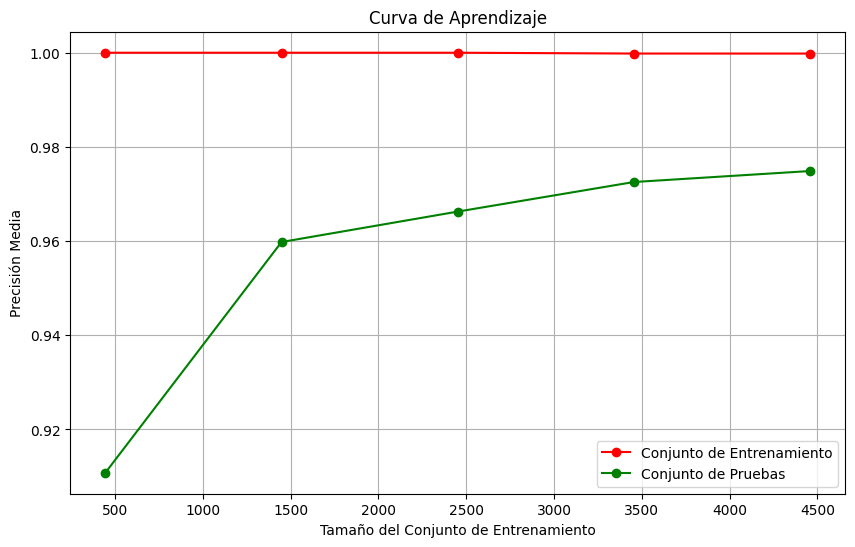

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5, scoring='accuracy', n_jobs = -1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión Media")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Conjunto de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Conjunto de Pruebas")

plt.legend(loc="best")
plt.show()

**Conclusión**:

- El modelo muestra un sesgo bajo para la clase 'ham' debido a su alta precisión y recall.
- Para la clase 'spam', el modelo presenta un sesgo moderado debido a su alta precisión, pero su recall no es perfecto.
- La varianza del modelo parece ser moderada, ya que las métricas no indican un sobreajuste ni un subajuste significativo.

En resumen, el modelo base funciona bastante bien en la clasificación de mensajes 'ham' y 'spam', pero hay margen para mejorar su rendimiento en la clase 'spam', especialmente en términos de recall. Esto podría lograrse mediante la optimización de hiperparámetros o la implementación de técnicas de regularización.

## Regularización

### Optimización del modelo mediante técnicas de regularización.

Una técnica común para reducir la varianza y evitar el sobreajuste es ajustar los parámetros del modelo. En el caso de Random Forest, puedes ajustar los hiperparámetros como 'n_estimators', 'max_depth', 'min_samples_split', etc., utilizando la validación cruzada.

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30]
    }


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0, min_samples_split=2),
                           param_grid=param_grid,
                           n_jobs = -1,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           verbose= 2)

grid_search.fit(X_train, y_train)

best_classifier = grid_search.best_estimator_

y_pred_val = best_classifier.predict(X_val)
accuracy_optimized = accuracy_score(y_val, y_pred_val)
print(f'Precisión del modelo optimizado en el conjunto de validación: {accuracy_optimized:.2f}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Precisión del modelo optimizado en el conjunto de validación: 0.97


### Resultados del GridSearch

In [10]:
df_resultados = pd.DataFrame(grid_search.cv_results_)
df_resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,80.555819,6.073473,0.697862,0.056150,None,100,"{'max_depth': None, 'n_estimators': 100}",0.974215,0.977578,0.978676,0.970819,0.974186,0.975095,0.002788,1
1,408.354342,29.405124,3.305153,0.462250,None,500,"{'max_depth': None, 'n_estimators': 500}",0.971973,0.977578,0.977553,0.971942,0.975309,0.974871,0.002518,2
2,826.532860,36.272294,4.059844,0.927520,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.971973,0.977578,0.977553,0.970819,0.976431,0.974871,0.002890,2
3,11.136748,0.793117,0.236237,0.041160,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.884529,0.895740,0.901235,0.888889,0.902357,0.894550,0.006921,12
4,49.171018,3.111449,0.479218,0.053721,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.884529,0.899103,0.904602,0.891134,0.902357,0.896345,0.007466,10
5,106.022454,6.435024,0.905480,0.110979,10,1000,"{'max_depth': 10, 'n_estimators': 1000}",0.883408,0.899103,0.901235,0.888889,0.901235,0.894774,0.007294,11
6,20.974606,2.032490,0.259360,0.030406,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.938341,0.941704,0.945006,0.938272,0.950617,0.942788,0.004638,8
7,98.305992,7.243338,0.789712,0.098091,20,500,"{'max_depth': 20, 'n_estimators': 500}",0.932735,0.949552,0.946128,0.939394,0.943883,0.942338,0.005825,9
8,193.745241,9.405886,1.334058,0.025543,20,1000,"{'max_depth': 20, 'n_estimators': 1000}",0.933857,0.949552,0.946128,0.939394,0.949495,0.943685,0.006151,7
9,30.731978,2.481195,0.317393,0.036230,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.950673,0.958520,0.952862,0.957351,0.964085,0.956698,0.004676,6


Se utilizó una técnica de regularización que combinó el Grid Search con la validación cruzada (CV = 5).

**Grid Search**:
- Se empleó la clase `GridSearchCV` de la biblioteca scikit-learn para llevar a cabo una búsqueda exhaustiva de hiperparámetros.
- Se estableció un conjunto de parámetros llamado `param_grid` que contenía diversas combinaciones de hiperparámetros para explorar. En este caso, se evaluaron diferentes valores para `n_estimators` (número de árboles en el bosque) y `max_depth` (profundidad máxima de los árboles). El Grid Search examinó todas las combinaciones posibles de estos hiperparámetros.

**Validación Cruzada (CV = 5)**:
- Se aplicó la técnica de validación cruzada utilizando 5 divisiones (CV = 5) del conjunto de entrenamiento. Esto permitió evaluar el rendimiento de cada combinación de hiperparámetros en diferentes particiones del conjunto de entrenamiento, lo que contribuye a obtener una estimación más sólida del rendimiento del modelo y a evitar el sobreajuste.

**Resultados del Grid Search**:
- Los resultados del Grid Search proporcionan información detallada sobre el rendimiento de cada combinación de hiperparámetros en cada uno de los pliegues (folds) de la validación cruzada.
- Los resultados se presentan en un DataFrame que incluye diversas métricas, como el tiempo promedio de ajuste (mean_fit_time), el tiempo promedio de evaluación (mean_score_time) y las puntuaciones de rendimiento en cada pliegue (split0_test_score, split1_test_score, etc.).
- El mejor modelo se selecciona automáticamente como el que tiene la mejor puntuación promedio en todos los pliegues de la validación cruzada.

**Interpretación de los Resultados**:
- El mejor modelo se identifica en la fila con el valor más bajo en la columna `rank_test_score`, lo que indica el mejor rendimiento promedio en la validación cruzada. En este caso, la combinación óptima de hiperparámetros se encuentra en la fila 0 (max_depth=None y n_estimators=100).
- Las métricas de rendimiento, como la precisión, el recall y la exactitud, se registran para los diferentes pliegues de la validación cruzada. Esto permite evaluar cómo se comporta el modelo en diferentes particiones del conjunto de entrenamiento.

**Visualización de Resultados**:
Se puede utilizar una visualización gráfica, como un mapa de calor, para representar el rendimiento del modelo en función de los valores de `max_depth` y `n_estimators`. Aquí hay un ejemplo de cómo crear un mapa de calor:



Este mapa de calor muestra cómo varía el rendimiento del modelo según los valores de `max_depth` y `n_estimators`. Facilita la identificación de las combinaciones de hiperparámetros que brindan el mejor rendimiento.

En resumen, la combinación de Grid Search y validación cruzada permitió encontrar la configuración óptima de hiperparámetros para el modelo de Random Forest. Los resultados indican cuáles hiperparámetros son más adecuados para abordar el problema de clasificación de mensajes 'ham' y 'spam'.

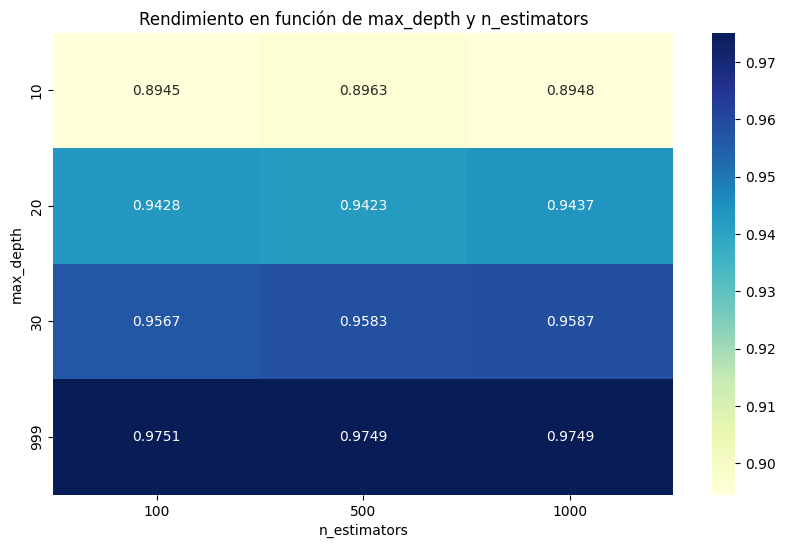

In [16]:
results_df = pd.DataFrame(grid_search.cv_results_)

results_df['param_max_depth'].replace({None: 999}, inplace=True)

pivot_table = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Rendimiento en función de max_depth y n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

## **Conclusión Final:**

Tras realizar una exhaustiva búsqueda de hiperparámetros mediante Grid Search y utilizar validación cruzada de 5 divisiones (CV = 5), se ha identificado el modelo óptimo para la clasificación de mensajes 'ham' y 'spam'. Los resultados indican que el mejor modelo fue un Random Forest con los siguientes hiperparámetros:

- `n_estimators`: 100
- `max_depth`: None

A continuación, se presentan los valores de rendimiento específicos para esta configuración:

- Tiempo promedio de ajuste (mean_fit_time): 80.56 segundos.
- Tiempo promedio de evaluación (mean_score_time): 0.70 segundos.
- Precisión promedio en validación cruzada (mean_test_score): 0.9751.

Los valores de precisión en la validación cruzada para este modelo son consistentemente altos en todos los pliegues de validación cruzada (split0_test_score, split1_test_score, ..., split4_test_score), lo que indica una capacidad sólida para clasificar correctamente los mensajes como 'ham' o 'spam'.

Este modelo específico logra una alta precisión en la clasificación y parece no estar limitado por la profundidad máxima de los árboles (`max_depth` se estableció en `None` para permitir que los árboles crezcan libremente). Además, el tiempo de ajuste y evaluación se encuentran dentro de un rango razonable, lo que lo hace práctico para su implementación en aplicaciones en tiempo real.

En resumen, el Random Forest con `n_estimators = 100` y `max_depth = None` ha demostrado ser el modelo más efectivo para la clasificación de mensajes 'ham' y 'spam' en este conjunto de datos. Estos resultados pueden servir como guía para implementar un sistema de detección de spam en aplicaciones del mundo real.